In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset import

In [2]:
barts_hotspots = pd.read_csv('./data/barts_hotspots.csv', parse_dates=['Date'])
barts_to_all = pd.read_csv('./data/barts_to_all.csv')
hotspots_to_all = pd.read_csv('./data/hotspots_to_all.csv')
hours_q1 = pd.read_csv('./data/hours_q1.csv')
hours_q2 = pd.read_csv('./data/hours_q2.csv')

In [3]:
display(barts_hotspots.head())

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,793.0,654.0,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,985.0,791.0,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,720.0,528.0,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,941.0,429.0,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN


In [4]:
barts_to_all.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,3603,"Embarcadero, San Francisco, CA",1987,709716 (1987),"4/1/2019 - 6/30/2019, Every day, Daily Average",3373,2479,4589
1,3603,"Embarcadero, San Francisco, CA",1994,910502 (1994),"4/1/2019 - 6/30/2019, Every day, Daily Average",2888,2486,3353
2,3603,"Embarcadero, San Francisco, CA",2020,609301 (2020),"4/1/2019 - 6/30/2019, Every day, Daily Average",3015,2173,4182
3,3603,"Embarcadero, San Francisco, CA",2044,609270 (2044),"4/1/2019 - 6/30/2019, Every day, Daily Average",3019,2156,4226
4,3603,"Embarcadero, San Francisco, CA",2054,609261 (2054),"4/1/2019 - 6/30/2019, Every day, Daily Average",2916,2079,4089


In [5]:
hotspots_to_all.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,3394,"Fisherman's Wharf, San Francisco, CA",1608,709746 (1608),"4/1/2019 - 6/30/2019, Every day, Daily Average",4030,3244,5005
1,3394,"Fisherman's Wharf, San Francisco, CA",1803,809911 (1803),"4/1/2019 - 6/30/2019, Every day, Daily Average",3782,3110,4599
2,3394,"Fisherman's Wharf, San Francisco, CA",1845,910670 (1845),"4/1/2019 - 6/30/2019, Every day, Daily Average",2412,2133,2726
3,3394,"Fisherman's Wharf, San Francisco, CA",1864,709739 (1864),"4/1/2019 - 6/30/2019, Every day, Daily Average",4453,3546,5590
4,3394,"Fisherman's Wharf, San Francisco, CA",1866,809914 (1866),"4/1/2019 - 6/30/2019, Every day, Daily Average",3592,2884,4472


In [6]:
hours_q1.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3768,3700,3,161.58,87.83,147.02,1.49
1,3772,3660,3,373.98,217.24,328.16,1.65
2,3751,3708,6,1197.27,259.18,1171.36,1.23
3,3761,3608,6,588.32,223.30,557.92,1.36
4,3767,3724,17,438.98,235.70,395.22,1.55


In [7]:
hours_q2.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3709,3671,13,875.06,232.37,850.74,1.25
1,3708,3681,13,850.12,224.94,826.64,1.25
2,3632,3715,8,1017.34,298.82,973.40,1.35
3,3642,3615,8,94.17,75.18,71.61,2.17
4,3643,3605,8,171.74,205.52,112.04,2.41


# Data Exploration

## Explore Barts_Hotspots 

In [8]:
barts_hotspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 23 columns):
Date                                                       3258 non-null datetime64[ns]
Origin Movement ID                                         3258 non-null int64
Origin Display Name                                        3258 non-null object
Destination Movement ID                                    3258 non-null int64
Destination Display Name                                   3258 non-null object
Daily Mean Travel Time (Seconds)                           3200 non-null float64
Daily Range - Lower Bound Travel Time (Seconds)            3200 non-null float64
Daily Range - Upper Bound Travel Time (Seconds)            3200 non-null float64
AM Mean Travel Time (Seconds)                              1792 non-null float64
AM Range - Lower Bound Travel Time (Seconds)               1792 non-null float64
AM Range - Upper Bound Travel Time (Seconds)               1792 non-null float64
P

In [9]:
# Date column
barts_hotspots[barts_hotspots['Date'] == barts_hotspots['Date'].values[100]].head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
100,2019-06-13,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",646.0,466.0,895.0,596.0,468.0,...,1108.0,648.0,488.0,860.0,618.0,431.0,886.0,NaN,NaN,NaN
277,2019-06-13,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1514.0,1136.0,2018.0,1493.0,1330.0,...,2421.0,1341.0,1088.0,1652.0,NaN,NaN,NaN,NaN,NaN,NaN
281,2019-06-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",722.0,452.0,1151.0,575.0,448.0,...,1652.0,762.0,490.0,1185.0,566.0,378.0,848.0,424.0,346.0,519.0
461,2019-06-13,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",899.0,601.0,1346.0,714.0,529.0,...,1953.0,823.0,633.0,1070.0,739.0,567.0,962.0,NaN,NaN,NaN
485,2019-06-13,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1149.0,881.0,1500.0,967.0,853.0,...,1857.0,1270.0,1044.0,1545.0,974.0,798.0,1188.0,NaN,NaN,NaN


In [10]:
# unique barts station
display(barts_to_all['Origin Display Name'].nunique())
display(barts_to_all['Origin Display Name'].unique(), barts_to_all['Origin Movement ID'].unique())

3

array(['Embarcadero, San Francisco, CA',
       '2nd Street and Stevenson Street (Montgomery BART, San Francisco, CA',
       'Powell BART Station, Market St and Powell St, San Francisco, CA'],
      dtype=object)

array([3603, 3692, 3760])

In [11]:
# unique hotspots 
display(hotspots_to_all['Origin Display Name'].nunique())
display(hotspots_to_all['Origin Display Name'].unique(), hotspots_to_all['Origin Movement ID'].unique())

3

array(["Fisherman's Wharf, San Francisco, CA",
       'Oracle Park, 24 Willie Mays Plaza, San Francisco, CA',
       'The Palace Of Fine Arts, 3601 Lyon St, San Francisco, CA'],
      dtype=object)

array([3394, 3792, 3396])

In [12]:
# number of destination from barts to all specific destination
barts_to_all['Destination Movement ID'].nunique()

2203

In [13]:
# number of destination from hotspots to all specific  destination
hotspots_to_all['Destination Movement ID'].nunique()

1826

In [14]:
# number of unique sourceid and dstid in the first quarter 
hours_q1['sourceid'].nunique(), hours_q1['dstid'].nunique()

(203, 205)

In [15]:
# number of unique sourceid and dstid in the second quarter
hours_q2['sourceid'].nunique(), hours_q2['dstid'].nunique() 

(203, 205)

## Exploration results

barts_hotspots: **3 unique barts station** and **3 unique hotspots**

# Part 1 

## Data imputation

We will impute null values in barts_hotspots dataframe with mean values of origin/destination pairs within each features. (mostly in AM/PM, Early Morning/Midday/Evening time)

In [16]:
# loop through all columns and check if there are null values
for col in barts_hotspots.columns:
    if barts_hotspots[col].isnull().sum():
        barts_hotspots[col] = barts_hotspots.groupby(
            ['Origin Movement ID', 'Destination Movement ID'])[col].apply(lambda x: x.fillna(x.mean()))


In [17]:
barts_hotspots

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.000000,1054.000000,2392.000000,1360.186916,1111.672897,...,1714.530612,1304.377358,1081.886792,1580.094340,1188.700000,965.400000,1470.500000,NaN,NaN,NaN
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.000000,512.000000,796.000000,628.894309,497.739837,...,793.000000,654.000000,524.000000,817.000000,608.000000,492.000000,753.000000,534.600000,423.700000,684.600000
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.000000,520.000000,1024.000000,628.894309,497.739837,...,985.000000,791.000000,590.000000,1061.000000,569.000000,406.000000,797.000000,534.600000,423.700000,684.600000
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.000000,371.000000,705.000000,648.000000,461.000000,...,720.000000,528.000000,398.000000,702.000000,442.000000,321.000000,608.000000,363.000000,297.000000,443.000000
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.000000,364.000000,701.000000,621.000000,489.000000,...,941.000000,429.000000,339.000000,542.000000,502.000000,354.000000,711.000000,391.422535,312.507042,494.929577
5,2019-06-30,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.000000,385.000000,987.000000,665.742515,488.047904,...,1017.000000,520.222222,386.116667,704.883333,386.000000,276.000000,541.000000,391.422535,312.507042,494.929577
6,2019-04-23,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",682.000000,500.000000,931.000000,628.894309,497.739837,...,949.000000,756.000000,577.000000,991.000000,550.000000,406.000000,745.000000,534.600000,423.700000,684.600000
7,2019-05-13,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",634.000000,457.000000,878.000000,628.894309,497.739837,...,893.000000,584.000000,470.000000,726.000000,611.000000,424.000000,880.000000,534.600000,423.700000,684.600000
8,2019-05-15,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.000000,621.000000,1243.000000,904.000000,650.000000,...,1549.000000,732.000000,586.000000,915.000000,795.000000,612.000000,1032.000000,568.000000,438.000000,736.000000
9,2019-04-14,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",996.000000,853.000000,1164.000000,1097.571429,917.714286,...,1660.885714,1063.000000,928.000000,1219.000000,1045.547368,860.589474,1275.073684,NaN,NaN,NaN


## Big pictures

### First quarter vs. second quarter travel times

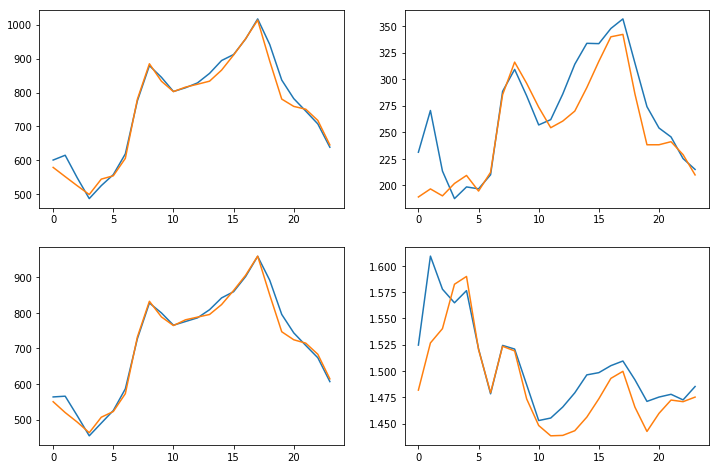

In [18]:
# average travel times per day in the first quarter and second quarter
travel_times_q1 = hours_q1.groupby('hod').mean().iloc[:, 2:]
travel_times_q2 = hours_q2.groupby('hod').mean().iloc[:, 2:]

# line chart
fig, ax = plt.subplots(2, 2, figsize=[12,8])

# 1) mean travel times
ax[0][0].plot(travel_times_q1.index.values, travel_times_q1['mean_travel_time'])
ax[0][0].plot(travel_times_q2.index.values, travel_times_q2['mean_travel_time'])

# 2) std travel times
ax[0][1].plot(travel_times_q1.index.values, travel_times_q1['standard_deviation_travel_time'])
ax[0][1].plot(travel_times_q2.index.values, travel_times_q2['standard_deviation_travel_time'])

# 3) geometric mean travel times
ax[1][0].plot(travel_times_q1.index.values, travel_times_q1['geometric_mean_travel_time'])
ax[1][0].plot(travel_times_q2.index.values, travel_times_q2['geometric_mean_travel_time'])

# 4) geometric std travel times
ax[1][1].plot(travel_times_q1.index.values, travel_times_q1['geometric_standard_deviation_travel_time'])
ax[1][1].plot(travel_times_q2.index.values, travel_times_q2['geometric_standard_deviation_travel_time'])


Based on 4 line charts above, we found that either mean or std for each quarter are quite similar for each hour, as well as geometric mean and geometric std. Thus, we decide to merge two datasets for future comparison between travel times within the sf region as a whole versus those among 3 barts station and 3 hotspots.

In [19]:
hours = pd.concat([hours_q1, hours_q2])
hours.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3768,3700,3,161.58,87.83,147.02,1.49
1,3772,3660,3,373.98,217.24,328.16,1.65
2,3751,3708,6,1197.27,259.18,1171.36,1.23
3,3761,3608,6,588.32,223.30,557.92,1.36
4,3767,3724,17,438.98,235.70,395.22,1.55


## Recommandation for minimizing the travel time

For every Hotspot, recommend the appropriate BART station to get off or get on of in order to **minimize travel time**.
- Does the appropriate BART station change throughout the day? Throughout the week?

In [20]:
barts_id = [3603, 3692, 3760]
hotspots_id = [3394, 3792, 3396]
display('Bart station and ID')
barts = barts_to_all[['Origin Movement ID', 'Origin Display Name']].drop_duplicates().reset_index(drop=True)
display(barts)
display('Hotspots and ID')
hotspots = hotspots_to_all[['Origin Movement ID', 'Origin Display Name']].drop_duplicates().reset_index(drop=True)
display(hotspots)
six_spots = pd.concat([barts, hotspots])
six_spots['type'] = ['bart']*3+['hotspot']*3
display(six_spots)

'Bart station and ID'

,Origin Movement ID,Origin Display Name
0,3603,"Embarcadero, San Francisco, CA"
1,3692,2nd Street and Stevenson Street (Montgomery BA...
2,3760,"Powell BART Station, Market St and Powell St, ..."


'Hotspots and ID'

,Origin Movement ID,Origin Display Name
0,3394,"Fisherman's Wharf, San Francisco, CA"
1,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis..."
2,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra..."


,Origin Movement ID,Origin Display Name,type
0,3603,"Embarcadero, San Francisco, CA",bart
1,3692,2nd Street and Stevenson Street (Montgomery BA...,bart
2,3760,"Powell BART Station, Market St and Powell St, ...",bart
0,3394,"Fisherman's Wharf, San Francisco, CA",hotspot
1,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",hotspot
2,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",hotspot


### Recommandation of bart station for each hotspot (units: day of the week)

In [21]:
barts_hotspots_day = barts_hotspots.iloc[:,:8].copy()
barts_hotspots_day.head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds)
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0


In [22]:
# add day of the week column
day_of_week = pd.to_datetime(barts_hotspots_day['Date']).dt.dayofweek
barts_hotspots_day['Day Of Week'] = day_of_week

# barts to hotspots
barts_to_hotspots_day = barts_hotspots_day[(
    barts_hotspots_day['Origin Movement ID'].isin(barts_id))]
barts_to_hotspots_day = barts_to_hotspots_day[
    barts_to_hotspots_day['Destination Movement ID'].isin(hotspots_id)]


In [23]:
# groupby each hotspot as the destination and
# find the Bart station which takes minimal travel time to the destination
def getMinIndex(pls):
    df = pls.apply(lambda row: row==row.min(), axis=1).T.apply(lambda col: col.index[col][0])
    return df
    
barts_to_hotspots_day.pivot_table(
    index=['Destination Movement ID'],
    columns=['Day Of Week', 'Origin Movement ID'],
    values=['Daily Mean Travel Time (Seconds)'
            ]).groupby(level=1, axis=1).apply(lambda x: getMinIndex(x)).applymap(lambda a: a[2])

Day Of Week,0,1,2,3,4,5,6
Destination Movement ID,,,,,,,
3394,3603,3603,3603,3603,3603,3603,3603
3396,3603,3603,3603,3603,3603,3603,3603
3792,3692,3692,3692,3692,3692,3692,3692


## Visualizing Time Series

### Seasonal plot of the time series (by Month)

# Part 2

## Expand Dataset 

### By hour

#### add day of the week

In [24]:
day_of_week = pd.to_datetime(barts_hotspots_day['Date']).dt.dayofweek
barts_hotspots['Day Of Week'] = day_of_week

#### merge hours_q1 and hours_q2 into barts_hotspots

We will merge hourly data into barts_hotspots for the purpose of model training based on each origin/destination pai. For (Powell, Fisherman), (Fisherman, Powell), (Powell, Palace), (Palace, Powell), since we have missing data for these for pairs, we will fill them with the overall mean within the respective quarter.

In [25]:
# copy of barts_hotspots df
barts_hotspots_hours = barts_hotspots.copy()
barts_hotspots_hours['Date'] = pd.to_datetime(barts_hotspots_hours['Date'])

# first quarter merging
barts_hotspots_q1 = barts_hotspots_hours[
    barts_hotspots_hours['Date'] < pd.Timestamp('04/01/2019')]
barts_hotspots_q1 = pd.merge(barts_hotspots_q1,
         hours_q1,
         how='inner',
         left_on=['Origin Movement ID', 'Destination Movement ID'],
        right_on = ['sourceid', 'dstid'])
barts_hotspots_q1.head(3)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Day Of Week,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,8,586.67,272.66,558.26,1.34
1,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,10,575.34,198.43,546.24,1.38
2,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,3,446.21,289.21,409.78,1.43


In [26]:
# second quarter merging
barts_hotspots_q2 = barts_hotspots_hours[
    barts_hotspots_hours['Date'] >= pd.Timestamp('04/01/2019')]
barts_hotspots_q2 = pd.merge(barts_hotspots_q2,
         hours_q2,
         how='inner',
         left_on=['Origin Movement ID', 'Destination Movement ID'],
        right_on = ['sourceid', 'dstid'])
barts_hotspots_q2.head(3)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Day Of Week,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,297.0,443.0,3,3792,3603,6,382.44,116.47,371.55,1.25
1,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,297.0,443.0,3,3792,3603,14,471.49,153.09,452.84,1.31
2,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,297.0,443.0,3,3792,3603,15,515.94,226.08,484.05,1.40


In [27]:
# merge the first quarter table and the second quarter table
barts_hotspots_hourly = pd.concat([barts_hotspots_q1, barts_hotspots_q2])
barts_hotspots_hourly.head(3)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Day Of Week,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,8,586.67,272.66,558.26,1.34
1,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,10,575.34,198.43,546.24,1.38
2,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,264.0,524.0,6,3603,3792,3,446.21,289.21,409.78,1.43


#### add weather feature

- Temperature data source link: https://www.ncdc.noaa.gov/cdo-web/
- Wind speed data source link: https://www.wunderground.com/history/monthly/us/ca/san-francisco/KSFO/date/2019-1

In [28]:
# temperature
sf_weather = pd.read_csv('./data/sf_weather.csv')
sf_weather = sf_weather[
    sf_weather['NAME'] ==
    'SAN FRANCISCO DOWNTOWN, CA US'].iloc[:, [1, 5, 8, 9]].reset_index(
        drop=True)
sf_weather['DATE'] = pd.to_datetime(sf_weather['DATE'])
sf_weather['TAVG'] = (sf_weather.TMAX + sf_weather.TMIN) / 2
sf_temperature = sf_weather.iloc[:, [1,4]]
sf_temperature.head()

,DATE,TAVG
0,2019-01-01,50.0
1,2019-01-02,49.5
2,2019-01-03,49.5
3,2019-01-04,50.5
4,2019-01-05,53.0


In [29]:
# wind speed
sf_wind_speed = pd.read_csv('./data/sf_wind_speed.csv')
sf_wind_speed['Date'] = pd.to_datetime(sf_wind_speed['Date'])
sf_wind_speed.head()

,Date,Wind_speed
0,2019-01-01,7.8
1,2019-01-02,1.6
2,2019-01-03,2.9
3,2019-01-04,3.9
4,2019-01-05,16.1


In [30]:
# merge all the weather data by date
new_barts_hotspots = pd.merge(barts_hotspots_hourly,
                              sf_temperature,
                              how='left',
                              left_on='Date',
                              right_on='DATE').drop('DATE', axis=1)
new_barts_hotspots = pd.merge(new_barts_hotspots,
                              sf_wind_speed,
                              how='left',
                              left_on='Date',
                              right_on='Date')
new_barts_hotspots.head(3)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Day Of Week,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,TAVG,Wind_speed
0,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,6,3603,3792,8,586.67,272.66,558.26,1.34,54.0,3.0
1,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,6,3603,3792,10,575.34,198.43,546.24,1.38,54.0,3.0
2,2019-01-13,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",449.0,328.0,614.0,413.0,288.0,...,6,3603,3792,3,446.21,289.21,409.78,1.43,54.0,3.0


/Users/kailing/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


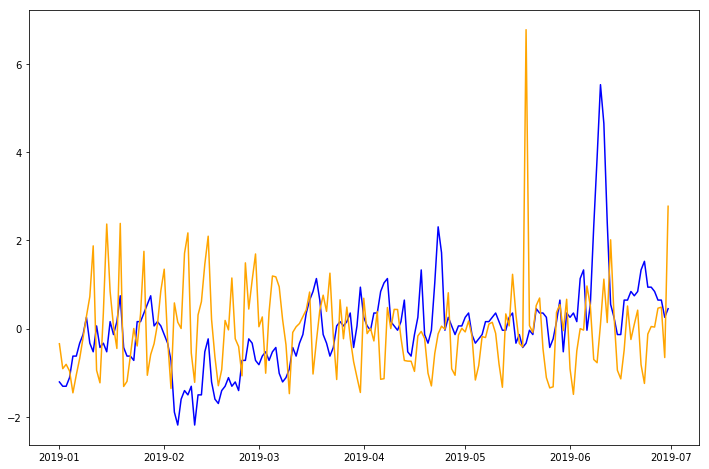

In [31]:
from sklearn.preprocessing import StandardScaler
a = new_barts_hotspots.groupby('Date').mean()
plt.figure(figsize=[12,8])
plt.plot(a.index.values, StandardScaler().fit_transform(a[['TAVG']]), color='blue')
plt.plot(a.index.values, StandardScaler().fit_transform(a[['Daily Mean Travel Time (Seconds)']]), color='orange')
#plt.plot(a.index.values, StandardScaler().fit_transform(a[['Wind_speed']]), color='purple')

In [32]:
six_spots

,Origin Movement ID,Origin Display Name,type
0,3603,"Embarcadero, San Francisco, CA",bart
1,3692,2nd Street and Stevenson Street (Montgomery BA...,bart
2,3760,"Powell BART Station, Market St and Powell St, ...",bart
0,3394,"Fisherman's Wharf, San Francisco, CA",hotspot
1,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",hotspot
2,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",hotspot


#### Examine correlation between each feature

In [33]:
new_barts_hotspots.corr()

,Origin Movement ID,Destination Movement ID,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),PM Mean Travel Time (Seconds),PM Range - Lower Bound Travel Time (Seconds),...,Day Of Week,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,TAVG,Wind_speed
Origin Movement ID,1.000000e+00,-0.587564,0.246728,0.270969,0.186373,0.406838,0.399164,0.385475,0.105798,0.101547,...,-3.215090e-16,1.000000e+00,-0.587564,0.018316,0.198227,0.107441,0.196717,0.070531,2.039001e-15,-8.617267e-16
Destination Movement ID,-5.875637e-01,1.000000,0.204954,0.206694,0.169706,-0.067431,-0.045967,-0.072941,0.314014,0.316879,...,-6.610656e-05,-5.875637e-01,1.000000,-0.002608,0.238642,0.243779,0.223500,0.161698,3.994208e-03,2.427795e-03
Daily Mean Travel Time (Seconds),2.467281e-01,0.204954,1.000000,0.905399,0.932443,0.687298,0.709029,0.615600,0.711376,0.722622,...,-1.235266e-01,2.467281e-01,0.204954,0.019488,0.455649,0.211100,0.477759,-0.105885,1.154914e-03,2.543228e-03
Daily Range - Lower Bound Travel Time (Seconds),2.709692e-01,0.206694,0.905399,1.000000,0.696833,0.696590,0.768164,0.578686,0.757608,0.813526,...,-1.491631e-01,2.709692e-01,0.206694,0.024876,0.556242,0.225103,0.592681,-0.213244,1.318721e-02,2.208783e-02
Daily Range - Upper Bound Travel Time (Seconds),1.863733e-01,0.169706,0.932443,0.696833,1.000000,0.581377,0.561689,0.555035,0.544989,0.525641,...,-6.655011e-02,1.863733e-01,0.169706,0.012121,0.308822,0.166708,0.317131,-0.015056,-7.686365e-03,-1.861413e-02
AM Mean Travel Time (Seconds),4.068376e-01,-0.067431,0.687298,0.696590,0.581377,1.000000,0.958210,0.960729,0.482205,0.518436,...,-1.818697e-01,4.068376e-01,-0.067431,0.020924,0.377323,0.133369,0.404644,-0.151084,1.269434e-02,1.884430e-02
AM Range - Lower Bound Travel Time (Seconds),3.991639e-01,-0.045967,0.709029,0.768164,0.561689,0.958210,1.000000,0.842549,0.549765,0.602338,...,-1.621260e-01,3.991639e-01,-0.045967,0.027816,0.444287,0.129553,0.483952,-0.225674,1.524848e-02,5.161036e-03
AM Range - Upper Bound Travel Time (Seconds),3.854753e-01,-0.072941,0.615600,0.578686,0.555035,0.960729,0.842549,1.000000,0.384654,0.403054,...,-1.795486e-01,3.854753e-01,-0.072941,0.013523,0.292074,0.130120,0.305905,-0.067061,7.158389e-03,3.339710e-02
PM Mean Travel Time (Seconds),1.057982e-01,0.314014,0.711376,0.757608,0.544989,0.482205,0.549765,0.384654,1.000000,0.967884,...,-2.493962e-01,1.057982e-01,0.314014,0.019431,0.441912,0.192408,0.467729,-0.123501,4.494614e-03,4.813654e-02
PM Range - Lower Bound Travel Time (Seconds),1.015472e-01,0.316879,0.722622,0.813526,0.525641,0.518436,0.602338,0.403054,0.967884,1.000000,...,-2.264478e-01,1.015472e-01,0.316879,0.021683,0.494263,0.199736,0.527810,-0.188016,-3.410871e-03,4.044200e-02


### By Day

In [34]:
# copy for dates
barts_hotspots_days = barts_hotspots.copy()

In [35]:
# merge all the weather data by date
barts_hotspots_days = pd.merge(barts_hotspots_days,
                              sf_temperature,
                              how='left',
                              left_on='Date',
                              right_on='DATE').drop('DATE', axis=1)
barts_hotspots_days = pd.merge(barts_hotspots_days,
                              sf_wind_speed,
                              how='left',
                              left_on='Date',
                              right_on='Date')
barts_hotspots_days.head(3)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Day Of Week,TAVG,Wind_speed
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,1360.186916,1111.672897,...,1580.09434,1188.7,965.4,1470.5,NaN,NaN,NaN,6,76.0,5.0
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,628.894309,497.739837,...,817.00000,608.0,492.0,753.0,534.6,423.7,684.6,6,55.5,8.4
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,628.894309,497.739837,...,1061.00000,569.0,406.0,797.0,534.6,423.7,684.6,5,54.0,10.2


## Select 6 Bart/ Hotspot trips

Based on previous analysis, we decide to choose the following 3 bart_to_hotspot trips and 3 hotspot_to_bart trips:
- Barts to Hotspots:
    - 3603 (Embarcadero) - 3394 (Fisherman's Wharf)
    - 3603 (Embarcadero) - 3396 (Palace)
    - 3692 (Montgomery) - 3792 (Oracle Park)
- Hotspots to Barts:
    - 3394 (Fisherman's Wharf) - 3603 (Embarcadero)
    - 3396 (Palace) - 3603 (Embarcadero)
    - 3792 (Oracle Park) - 3692 (Montgomery)
    
The logistic that we are choosing these 6 trips is that they are the pairs which has the shortest travel times on average from origin to destination among all 18 combination of 6 spots.

In [36]:
# helper function that extract between specific origin and destination 
def get_origin_to_dest(df, origin_id, dest_id):
    return df[(df['Origin Movement ID'] == origin_id) & (df['Destination Movement ID'] == dest_id)].copy()

## Data cleaning

Since our prediction does not involve hours, we can just use barts_hotspots.

In [37]:
barts_hotspots_days.columns

Index(['Date', 'Origin Movement ID', 'Origin Display Name',
       'Destination Movement ID', 'Destination Display Name',
       'Daily Mean Travel Time (Seconds)',
       'Daily Range - Lower Bound Travel Time (Seconds)',
       'Daily Range - Upper Bound Travel Time (Seconds)',
       'AM Mean Travel Time (Seconds)',
       'AM Range - Lower Bound Travel Time (Seconds)',
       'AM Range - Upper Bound Travel Time (Seconds)',
       'PM Mean Travel Time (Seconds)',
       'PM Range - Lower Bound Travel Time (Seconds)',
       'PM Range - Upper Bound Travel Time (Seconds)',
       'Midday Mean Travel Time (Seconds)',
       'Midday Range - Lower Bound Travel Time (Seconds)',
       'Midday Range - Upper Bound Travel Time (Seconds)',
       'Evening Mean Travel Time (Seconds)',
       'Evening Range - Lower Bound Travel Time (Seconds)',
       'Evening Range - Upper Bound Travel Time (Seconds)',
       'Early Morning Mean Travel Time (Seconds)',
       'Early Morning Range - Lower Bound

In [38]:
# drop unnecessary columns
drop_cols = ['Origin Display Name', 'Destination Display Name']

# drop columns that have extremely high correlation with other features, which are redundant.
redundant_cols = [
    'Daily Range - Lower Bound Travel Time (Seconds)',
    'Daily Range - Upper Bound Travel Time (Seconds)',
    'AM Range - Lower Bound Travel Time (Seconds)',
    'AM Range - Upper Bound Travel Time (Seconds)',
    'PM Range - Lower Bound Travel Time (Seconds)',
    'PM Range - Upper Bound Travel Time (Seconds)',
    'Midday Range - Lower Bound Travel Time (Seconds)',
    'Midday Range - Upper Bound Travel Time (Seconds)',
    'Evening Range - Lower Bound Travel Time (Seconds)',
    'Evening Range - Upper Bound Travel Time (Seconds)',
    'Early Morning Range - Lower Bound Travel Time (Seconds)',
    'Early Morning Range - Upper Bound Travel Time (Seconds)',
]
drop_cols = drop_cols+redundant_cols
bart_hot = barts_hotspots_days.drop(drop_cols, axis=1)

In [39]:
# since hourly data are been removed, we can groupby the date and mean values for each column
bart_hot.columns

Index(['Date', 'Origin Movement ID', 'Destination Movement ID',
       'Daily Mean Travel Time (Seconds)', 'AM Mean Travel Time (Seconds)',
       'PM Mean Travel Time (Seconds)', 'Midday Mean Travel Time (Seconds)',
       'Evening Mean Travel Time (Seconds)',
       'Early Morning Mean Travel Time (Seconds)', 'Day Of Week', 'TAVG',
       'Wind_speed'],
      dtype='object')

In [40]:
bart_hot = bart_hot.sort_values('Date')

## Metadata

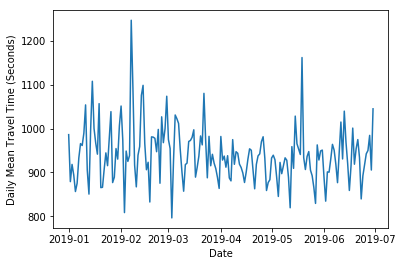

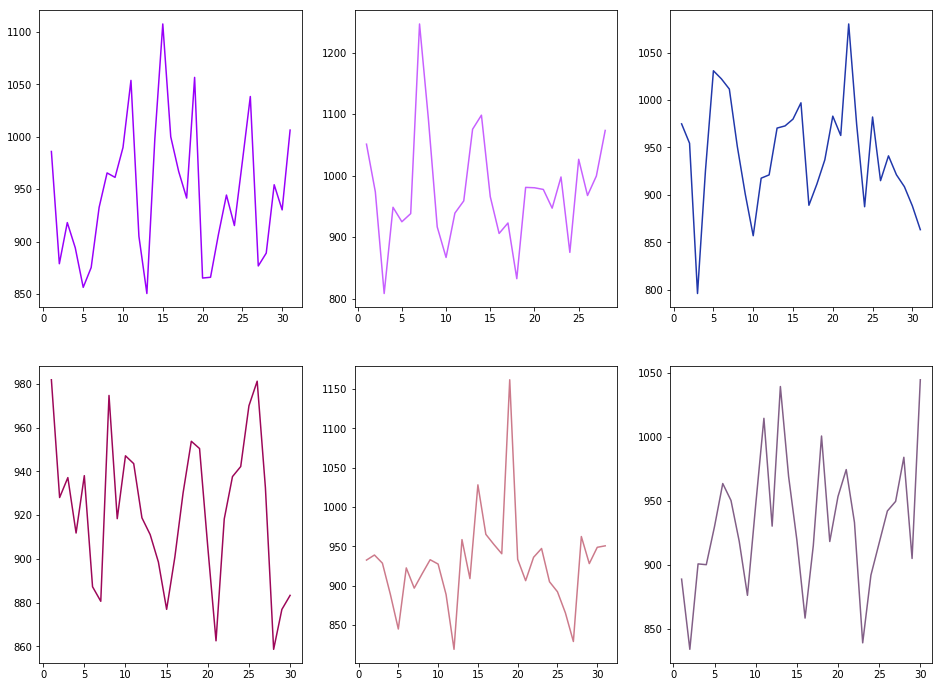

In [41]:
# visualization for daily travel times in sf area
# Prepare data
meta_bart_hot = bart_hot.groupby('Date').mean().reset_index()
meta_bart_hot['day'] = [d.day for d in meta_bart_hot.Date]
meta_bart_hot['month'] = [d.strftime('%b') for d in meta_bart_hot.Date]
meta_bart_hot = meta_bart_hot.sort_values('Date')

months = meta_bart_hot['month'].unique()

# Prep Colors
import matplotlib as mpl
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

# metadata for each month
def plot_daily_travel_times_by_months(df, month):
    return sns.lineplot(
        df[df['month'] == month]['day'], df[
            df['month'] == month]['Daily Mean Travel Time (Seconds)'])
    
def plot_daily_travel_times(df):
    return sns.lineplot(
        df['Date'], df['Daily Mean Travel Time (Seconds)'])

display(plot_daily_travel_times(meta_bart_hot))

fig, ax = plt.subplots(2, 3, figsize=[16,12])
k = 0
for i in range(2):
    for j in range(3):
        ax[i,j].plot(meta_bart_hot[meta_bart_hot['month'] == months[k]]['day'], meta_bart_hot[
            meta_bart_hot['month'] == months[k]]['Daily Mean Travel Time (Seconds)'], color=mycolors[k])
        k += 1

### One origin/destination pair

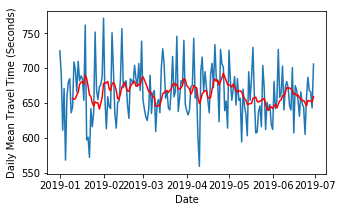

In [42]:
plt.figure(figsize=[5, 3])
plot_daily_travel_times(get_origin_to_dest(bart_hot, 3603, 3394))

# rolling mean and std
roll_mean = get_origin_to_dest(
    bart_hot, 3603,
    3394).set_index('Date')['Daily Mean Travel Time (Seconds)'].rolling(
        window=10).mean()
roll_std = get_origin_to_dest(
    bart_hot, 3603,
    3394).set_index('Date')['Daily Mean Travel Time (Seconds)'].rolling(
        window=10).std()
plt.plot(roll_mean, color='r', label='rolling mean')
#plt.plot(roll_std, color='black', label='rolling std')

## Test stationarity of travel times

In [190]:
# from statsmodels.tsa.stattools import adfuller, kpss

# using adcf test
result = adfuller(bart_hot['Daily Mean Travel Time (Seconds)'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -35.14828601946823
p-value: 0.0
Critial Values:
   1%, -3.4323605881678785
Critial Values:
   5%, -2.8624283577717917
Critial Values:
   10%, -2.567242891852544


## Seasonality test

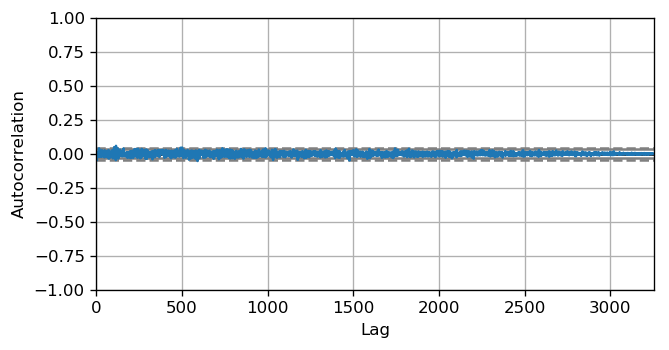

In [44]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(6
                                       ,3), 'figure.dpi':120})
autocorrelation_plot(bart_hot['Daily Mean Travel Time (Seconds)'].tolist())

## lag plot

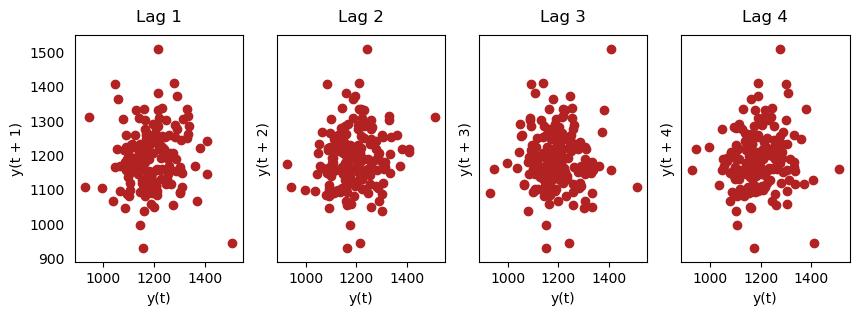

In [45]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left': False, 'axes.titlepad': 10})
# Plot
fig, axes = plt.subplots(1,
                         4,
                         figsize=(10, 3),
                         sharex=True,
                         sharey=True,
                         dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(get_origin_to_dest(bart_hot, 3603,
                                3396)['Daily Mean Travel Time (Seconds)'],
             lag=i + 1,
             ax=ax,
             c='firebrick')
    ax.set_title('Lag ' + str(i + 1))

## Decomposition

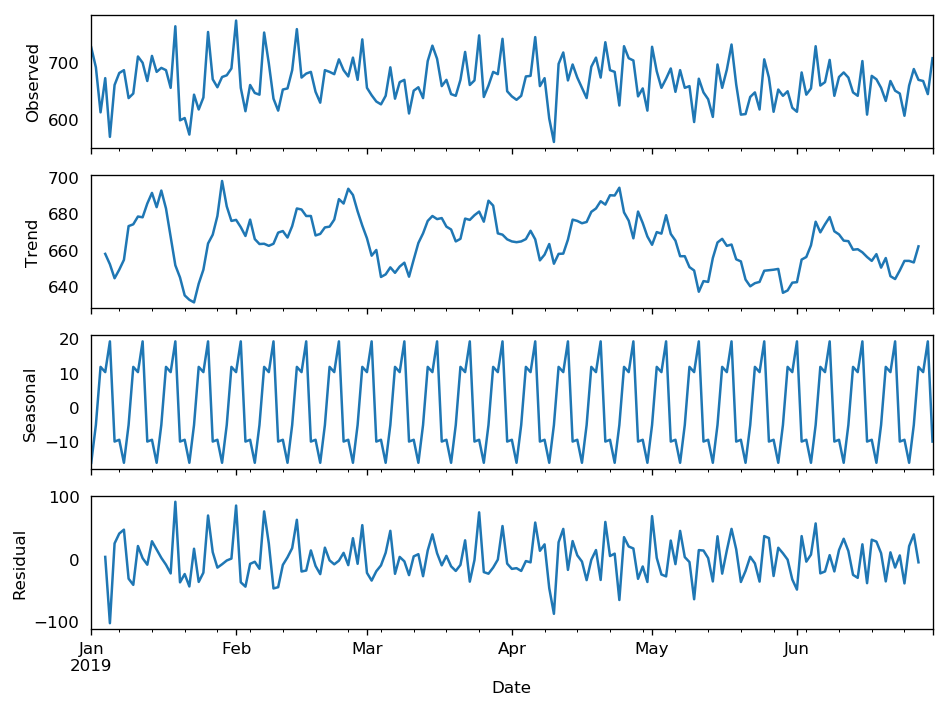

In [197]:
# on average
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as SDecompose
rcParams['figure.figsize'] = 8, 6
decomposition = SDecompose(get_origin_to_dest(bart_hot, 3603,3394).set_index('Date')['Daily Mean Travel Time (Seconds)'], model='additive')
fig = decomposition.plot()
plt.show()

- Weekday: long travel time
- Weekend: short travel time

## Cross validation

In [47]:
# According to 4.2, we will extract chosen 6 bart/hotspots trips

six_trips = {
    'embra_fisherman': get_origin_to_dest(bart_hot, 3603, 3394),
    'embra_palace': get_origin_to_dest(bart_hot, 3603, 3396),
    'mont_oracle': get_origin_to_dest(bart_hot, 3692, 3792),
    'fisherman_embra': get_origin_to_dest(bart_hot, 3394, 3603),
    'palace_embra': get_origin_to_dest(bart_hot, 3396, 3603),
    'oracle_mont': get_origin_to_dest(bart_hot, 3792, 3692)
}

In [48]:
# cross validation for all six trips and
from sklearn.model_selection import TimeSeriesSplit

# training set
# format: {trip_name_1:
#             {train_1: df_!, train_2: df_2, ...},
#          trip_name_2:
#             {train_1: ...},
#          ...}
train = {}
test = {}

tscv = TimeSeriesSplit(n_splits=5)
for key in six_trips.keys():
    train[key] = {}
    test[key] = {}
    for i, (train_index, test_index) in enumerate(tscv.split(six_trips[key])):
        train[key]['train_' + str(i)], = six_trips[key].iloc[train_index], 
        test[key]['test_' + str(i)] = six_trips[key].iloc[test_index]

## Univariate model

In [49]:
# extract X and y
# For univariate model, X only has date, and y is the travel time per day on average
uni_train = {}
for trip_name, tr_dict in train.items():
    uni_train[trip_name] = {}
    for tr_name, tr in tr_dict.items():
        uni_tr = tr.set_index('Date')['Daily Mean Travel Time (Seconds)'] # a pandas series, indexed by date
        uni_train[trip_name][tr_name] = uni_tr

In [79]:
import statsmodels.api as sm
import itertools
import warnings

# we will use SARIMAX as our model, and MAE as our evaluation metric
def grid_search(uni_tr):
    # initialize result list
    best_score = float('inf')

    # initialize the grid parameters for grid search
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))] # 7 days of a week
    
    warnings.filterwarnings("ignore")
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
                uni_tr.index = pd.DatetimeIndex(uni_tr.index.values,
                               freq=uni_tr.index.inferred_freq)
                mod = sm.tsa.statespace.SARIMAX(uni_tr,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                               method='css')
                
                results = mod.fit(maxiter=200)
                
                # update best param
                if results.aic < best_score:
                    best_score = results.aic
                    best_param = param
                    best_param_seasonal = param_seasonal
    return best_score, best_param, best_param_seasonal

In [128]:
# construct a sarima model
def sarimax_model(uni_tr, params, params_seasonal):
    uni_model = sm.tsa.statespace.SARIMAX(uni_tr,
                                    order=params,
                                    seasonal_order=params_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    return uni_model.fit()


In [149]:
# make prediction
def make_prediction(uni_model_results):
    pred = uni_model_results.get_forecast(pd.to_datetime('2019-06-30'))
    return pred.predicted_mean, pred.conf_int()

def plot_predicition(trip_name, uni_tr, predicted_mean, conf_int):
    ax = uni_tr['2019':].plot(label='Observed')
    predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(6, 4))
    ax.fill_between(conf_int.index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Travel Times')
    plt.title(trip_name, fontsize=16)
    plt.legend(title_fontsize=12)
    plt.show()


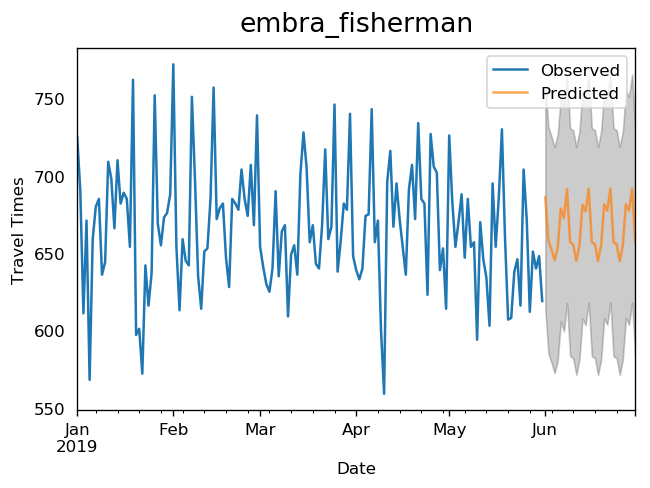

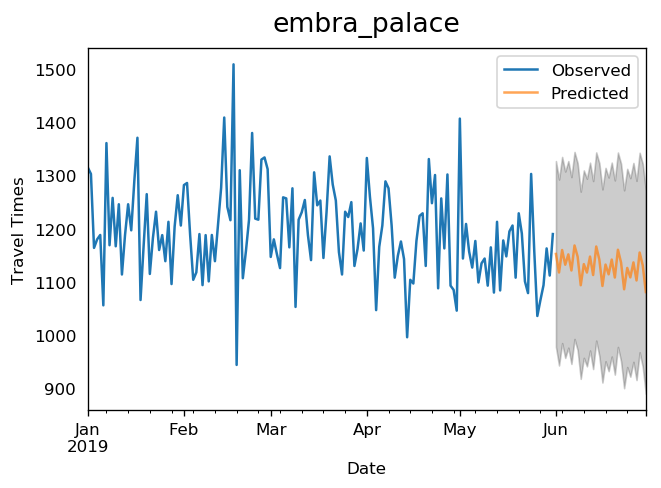

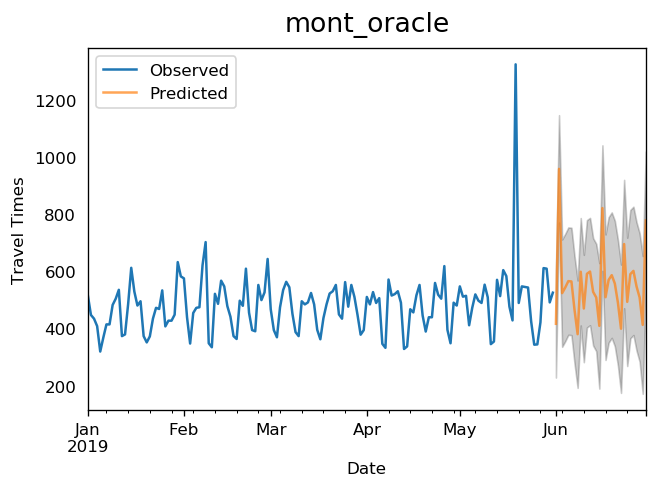

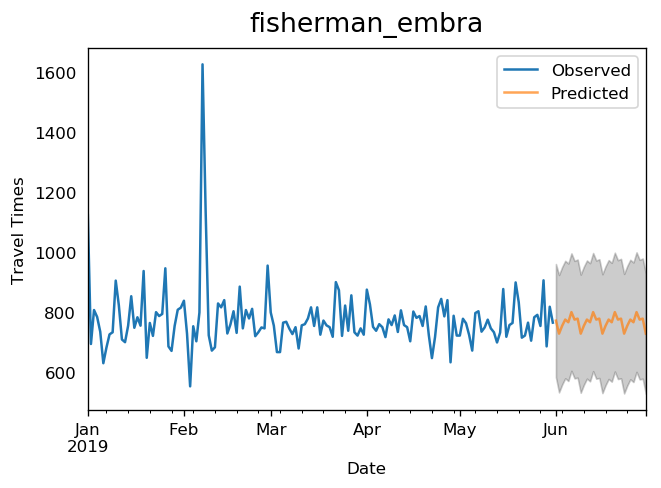

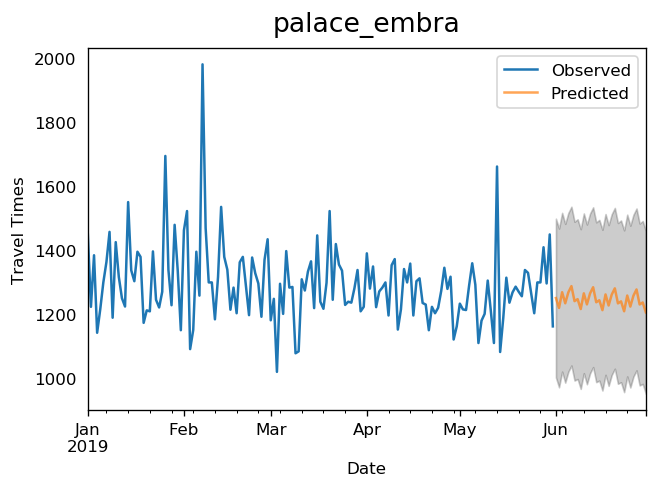

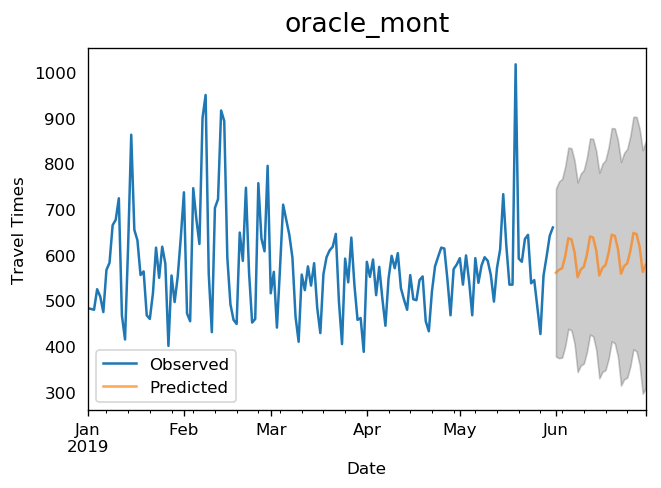

In [151]:
for trip_name, uni_tr in uni_train.items():
    tr = uni_tr['train_4'] # 150 training data (travel times) for each unique bart/hotspot route
    best_score, best_param, best_param_seasonal = grid_search(tr) # grid search for best params
    model_results = sarimax_model(tr, best_param, best_param_seasonal) # get univariate model results
    # get prediction means and upper and lower bound for the future 30 days
    prediction_mean, conf_int = make_prediction(model_results) 
    plot_predicition(trip_name, tr, prediction_mean, conf_int)
    

In [189]:
from sklearn.metrics import mean_absolute_error
# model performance on one bart/hotspot route (from Embracadero to Fisherman's Wharf)

for trip_name, uni_tr in uni_train.items():
    if trip_name == 'embra_fisherman':
        for i, (train_number, tr) in enumerate(uni_tr.items()):
            best_pscore, best_param, best_param_seasonal = grid_search(
                tr)  # grid search for best params
            model_results = sarimax_model(
                tr, best_param,
                best_param_seasonal)  # get univariate model results
            # get prediction means and upper and lower bound for the future 30 days
            y_pred, conf_int = make_prediction(model_results)
            y_true = test[trip_name][
                'test_' + str(i)].set_index('Date')['Daily Mean Travel Time (Seconds)']
            print('mean_absolute_error: ' +
                  str(mean_absolute_error(y_true, y_pred.values[-30:])) +
                  '\n' + 'Train date range: ' +
                  str((pd.to_datetime(tr.index.values[-1]) -
                       pd.to_datetime(tr.index.values[0])).days) +
                  str((pd.to_datetime(y_true.index.values[-1]) -
                       pd.to_datetime(y_true.index.values[0])).days))

mean_absolute_error: 610.265983569678
Train date range: 3029
mean_absolute_error: 56.70892734908021
Train date range: 6029
mean_absolute_error: 37.051493373336505
Train date range: 9029
mean_absolute_error: 33.73564750684861
Train date range: 12029
mean_absolute_error: 27.639220965673964
Train date range: 15029
